In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.callbacks import Callback
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.optimizers import SGD, RMSprop
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import random
import h5py

/home/hlnaima/workspace/ConvNetFaceDetection/virtualenv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Images loading

In [2]:
directory_1 = '../data/train/1/'
directory_0 = '../data/train/0/'

img_x = 36
img_y = 36

batch_size = 10
epochs = 10

In [3]:
X_1 = [cv2.imread(directory_1 + file, 0) for file in listdir(directory_1)]
y_1 = [1 for i in range(0, len(X_1))]

X_0 = [cv2.imread(directory_0 + file, 0) for file in listdir(directory_0)]
y_0 = [0 for i in range(0, len(X_0))]

data = np.array(X_0 + X_1)
target = np.array(y_0 + y_1)

data = data.reshape(data.shape[0], img_x, img_y, 1)

data = data.astype('float32')
data /= 255

target = to_categorical(target, 2)

In [4]:
data.shape

(91720, 36, 36, 1)

In [5]:
target[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Label =  [1. 0.]


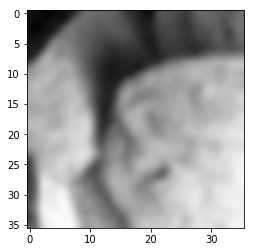

In [6]:
print('Label = ', target[0])
plt.imshow(data[0].reshape(img_x, img_y), cmap = 'gray', interpolation = 'bicubic')
plt.show()

Label =  [0. 1.]


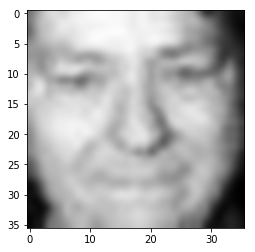

In [7]:
lastindex = len(data) - 1
print('Label = ', target[lastindex])
plt.imshow(data[lastindex].reshape(img_x, img_y), cmap = 'gray', interpolation = 'bicubic')
plt.show()

## Model architecture 

In [8]:
input_shape = (img_x, img_y, 1)

model = Sequential()

model.add(Conv2D(4, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(14, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(14, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [9]:
model.compile(loss=binary_crossentropy,
              optimizer=SGD(lr=0.01),
              metrics=['accuracy'])

## Model training

In [10]:
# Splitting the dataset to get the training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=0)

# Defining a callback to get some logs at the end of each epoch
class AccuracyHistory(Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

# Training the model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          validation_split=0.20,
          callbacks=[history])

Train on 58700 samples, validate on 14676 samples
Epoch 1/10
58700/58700 [==============================] - 168s 3ms/step - loss: 0.1937 - acc: 0.9225 - val_loss: 0.0877 - val_acc: 0.9687
Epoch 2/10
58700/58700 [==============================] - 169s 3ms/step - loss: 0.0614 - acc: 0.9787 - val_loss: 0.0618 - val_acc: 0.9782
Epoch 3/10
58700/58700 [==============================] - 158s 3ms/step - loss: 0.0390 - acc: 0.9866 - val_loss: 0.0404 - val_acc: 0.9870
Epoch 4/10
58700/58700 [==============================] - 159s 3ms/step - loss: 0.0311 - acc: 0.9898 - val_loss: 0.0319 - val_acc: 0.9890
Epoch 5/10
58700/58700 [==============================] - 156s 3ms/step - loss: 0.0251 - acc: 0.9911 - val_loss: 0.0294 - val_acc: 0.9905
Epoch 6/10
58700/58700 [==============================] - 160s 3ms/step - loss: 0.0213 - acc: 0.9928 - val_loss: 0.0271 - val_acc: 0.9916
Epoch 7/10
58700/58700 [==============================] - 156s 3ms/step - loss: 0.0185 - acc: 0.9935 - val_loss: 0.0252 - 

## Model testing

['loss', 'acc']
Test loss: 0.020096527809412974
Test accuracy: 0.9936764064544266


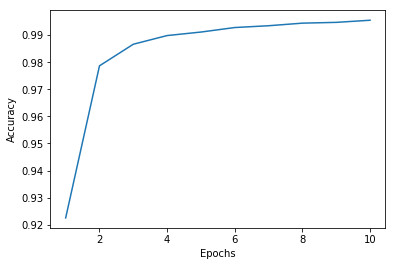

In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print(model.metrics_names)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Prediction

The result is :  [4.7131553e-07 9.9999952e-01]  y =  [0. 1.]


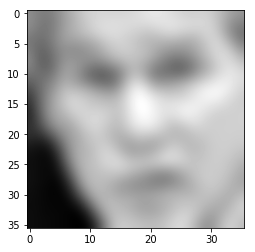

The result is :  [2.7708569e-09 1.0000000e+00]  y =  [0. 1.]


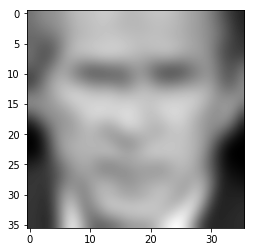

The result is :  [4.1105107e-08 1.0000000e+00]  y =  [0. 1.]


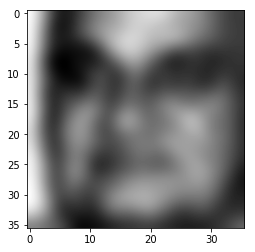

The result is :  [1.8075161e-04 9.9981922e-01]  y =  [0. 1.]


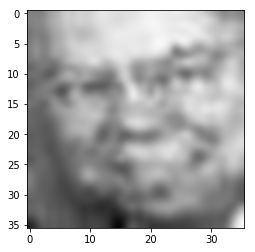

The result is :  [3.1655304e-08 1.0000000e+00]  y =  [0. 1.]


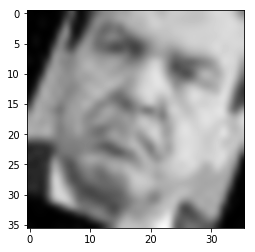

The result is :  [9.773827e-09 1.000000e+00]  y =  [0. 1.]


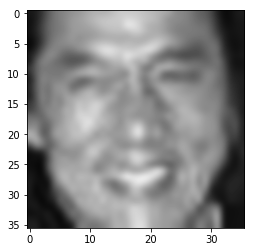

The result is :  [3.4805678e-09 1.0000000e+00]  y =  [0. 1.]


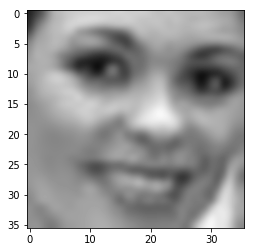

The result is :  [0.00461735 0.9953826 ]  y =  [0. 1.]


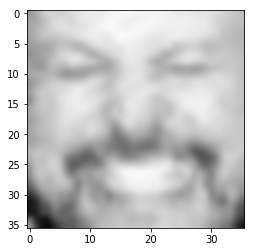

The result is :  [9.9988222e-01 1.1776099e-04]  y =  [1. 0.]


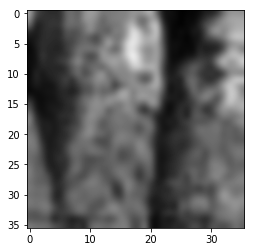

The result is :  [1.229613e-07 9.999999e-01]  y =  [0. 1.]


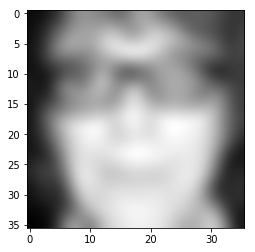

In [12]:
predictions = model.predict(np.array(X_test[:10]), verbose=0)

for i in range(0, 10) :
    print('The result is : ', predictions[i], ' y = ', y_test[i])

    plt.imshow(X_test[i].reshape(36, 36), cmap = 'gray', interpolation = 'bicubic')
    plt.show()

In [13]:
# Save the model
model.save('model_n.h5')